In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime,timedelta

In [2]:
customer_acquisition=pd.read_csv("C:/analytix_labs project/Data/Case Study 2 - Credit Card Case Study/Customer Acqusition.csv")
spend_data=pd.read_csv('C:/analytix_labs project/Data/Case Study 2 - Credit Card Case Study/Repayment.csv')
repayment_data=pd.read_csv('C:/analytix_labs project/Data/Case Study 2 - Credit Card Case Study/spend.csv')

In [3]:
customer_acquisition.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [4]:
customer_acquisition.drop('No',axis=1,inplace=True)

In [5]:
customer_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  100 non-null    object 
 1   Age       100 non-null    int64  
 2   City      100 non-null    object 
 3   Product   100 non-null    object 
 4   Limit     100 non-null    float64
 5   Company   100 non-null    object 
 6   Segment   100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ KB


In [6]:
spend_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


In [7]:
spend_data.drop('SL No:',axis=1,inplace=True)

In [8]:
spend_data.isnull().sum()

Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [9]:
spend_data.dropna(how='all',inplace=True)


In [10]:
spend_data.tail(5)

,Customer,Month,Amount,Unnamed: 4
1495,A67,9-May-05,55638.77,NaN
1496,A68,10-May-06,319836.49,NaN
1497,A69,11-Jul-06,247628.45,NaN
1498,A70,12-Aug-05,454016.51,NaN
1499,A71,13-Sep-04,56286.33,NaN


In [11]:
spend_data.drop('Unnamed: 4',axis=1,inplace=True)

In [12]:
spend_data

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88
...,...,...,...
1495,A67,9-May-05,55638.77
1496,A68,10-May-06,319836.49
1497,A69,11-Jul-06,247628.45
1498,A70,12-Aug-05,454016.51


In [13]:
repayment_data

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [14]:
repayment_data.drop('Sl No:',axis=1,inplace=True)

In [15]:
repayment_data.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [16]:
spend_data['Month'] = spend_data['Month'].apply(lambda x: pd.to_datetime(x))

In [17]:
repayment_data['Month'] = repayment_data['Month'].apply(lambda x: pd.to_datetime(x))

In [18]:
repayment_data.head(3)

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46


In [19]:
spend_data.head(2)

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02


In [20]:
customer_acquisition.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


## 1. In the above dataset,


## a. In case age is less than 18, replace it with mean of age values.

In [21]:
customer_acquisition.loc[(customer_acquisition['Age']<18),'Age']=customer_acquisition.Age.mean()

In [22]:
customer_acquisition

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
95,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 



In [23]:
spend_analysis = pd.merge(spend_data,customer_acquisition,on='Customer',how='left')

In [24]:
spend_analysis.loc[(spend_analysis['Amount']>spend_analysis['Limit']),'Amount']= spend_analysis['Limit']/2

In [25]:
spend_analysis

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,495414.75,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,2004-01-03,245899.02,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,2004-01-15,259490.06,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,2004-01-25,437555.12,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,2005-01-17,165972.88,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...
1495,A67,2005-05-09,55638.77,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,A68,2006-05-10,50000.00,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,A69,2006-07-11,5000.00,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,A70,2005-08-12,5000.50,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


# c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [26]:
repayment = pd.merge(repayment_data,customer_acquisition,on='Customer',how='left')
repayment.loc[(repayment['Amount']>repayment['Limit']),'Amount']= repayment['Limit']

In [27]:
repayment

,Customer,Month,Type,Amount,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,JEWELLERY,485470.80,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,2004-01-03,PETRO,410556.13,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,2004-01-15,CLOTHES,23740.46,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,2004-01-25,FOOD,484342.47,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,2005-01-17,CAMERA,369694.07,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...
1495,A67,2006-02-04,BUS TICKET,356872.73,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,A68,2006-03-25,BUS TICKET,100000.00,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,A69,2006-03-31,BUS TICKET,10000.00,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,A70,2006-03-23,BUS TICKET,10001.00,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


# 2. From the above dataset create the following summaries:


## a. How many distinct customers exist?

In [28]:
customer_acquisition['Customer'].nunique()

100

## b. How many distinct categories exist?

In [29]:
repayment['Product'].unique()

array(['Gold', 'Silver', 'Platimum'], dtype=object)

## c. What is the average monthly spend by customers?

In [44]:
Customer_Spend_Amount=spend_analysis.groupby(['Customer','Month'])[['Amount']].mean().reset_index()
Customer_Spend_Amount['Spend_Month']=Customer_Spend_Amount['Month'].apply(lambda x:x.month)
AvgMonthlySpend=Customer_Spend_Amount.groupby(['Customer','Spend_Month'])[['Amount']].mean().reset_index()
AvgMonthlySpend

,Customer,Spend_Month,Amount
0,A1,1,325723.331
1,A1,2,137713.785
2,A1,4,254474.580
3,A1,7,297176.740
4,A1,9,186427.500
...,...,...,...
553,A95,1,369405.960
554,A96,1,50000.000
555,A97,1,5000.000
556,A98,1,5000.500


## d. What is the average monthly repayment by customers?

In [46]:
Customer_Repayment_Amount=repayment.groupby(['Customer','Month'])[['Amount']].mean().reset_index()
Customer_Repayment_Amount['Repayment_Month']=Customer_Repayment_Amount['Month'].apply(lambda x:x.month)
AvgMonthlyRepayment=Customer_Repayment_Amount.groupby(['Customer','Repayment_Month'])[['Amount']].mean().reset_index()
AvgMonthlyRepayment.head(20)

,Customer,Repayment_Month,Amount
0,A1,1,341332.877000
1,A1,2,138421.151250
2,A1,4,261649.250000
3,A1,5,361141.310000
4,A1,8,344372.100000
5,A1,10,244534.680000
6,A1,11,183839.610000
7,A10,1,173828.282500
8,A10,2,170265.770000
9,A10,3,134631.266667


## e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [47]:
AvgMonthlyCustomers=pd.merge(left=AvgMonthlySpend,right=AvgMonthlyRepayment,left_on=['Customer','Spend_Month'],right_on=['Customer','Repayment_Month'])


In [48]:
AvgMonthlyCustomers['Monthly_Profit']=AvgMonthlyCustomers.Amount_y-AvgMonthlyCustomers.Amount_x


In [49]:
AvgMonthlyCustomers['Profit']=np.where(AvgMonthlyCustomers['Monthly_Profit']>0,AvgMonthlyCustomers['Monthly_Profit']*2.9/100,np.nan)
AvgMonthlyCustomers.head(20)

,Customer,Spend_Month,Amount_x,Repayment_Month,Amount_y,Monthly_Profit,Profit
0,A1,1,325723.331000,1,341332.877000,15609.546000,452.676834
1,A1,2,137713.785000,2,138421.151250,707.366250,20.513621
2,A1,4,254474.580000,4,261649.250000,7174.670000,208.065430
3,A1,11,285729.090000,11,183839.610000,-101889.480000,NaN
4,A10,1,283324.721667,1,173828.282500,-109496.439167,NaN
5,A10,2,217344.503333,2,170265.770000,-47078.733333,NaN
6,A10,3,240130.543333,3,134631.266667,-105499.276667,NaN
7,A10,4,120467.322500,4,270721.680000,150254.357500,4357.376367
8,A10,5,98672.695000,5,189207.392500,90534.697500,2625.506228
9,A10,7,358194.650000,7,239798.030000,-118396.620000,NaN


### f. What are the top 5 product types?

In [53]:
repayment_data.groupby(by='Type')[['Amount']].sum().sort_values('Amount',ascending=False).head(5)

,Amount
Type,
PETRO,49863174.09
CAMERA,41481571.96
FOOD,37773338.43
TRAIN TICKET,33067077.15
AIR TICKET,32955445.42


### g. Which city is having maximum spend?

In [57]:
spend_analysis.groupby('City')['Amount'].sum().reset_index().sort_values('Amount',ascending=False)

,City,Amount
4,COCHIN,47477736.75
0,BANGALORE,44966664.04
2,CALCUTTA,39074614.82
1,BOMBAY,31153988.46
3,CHENNAI,20089449.37
7,TRIVANDRUM,16107163.25
6,PATNA,14533121.29
5,DELHI,11749232.11


### h. Which age group is spending more money?

In [58]:
spend_analysis

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment,spend_month
0,A1,2004-01-12,495414.75,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,1
1,A1,2004-01-03,245899.02,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,1
2,A1,2004-01-15,259490.06,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,1
3,A1,2004-01-25,437555.12,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,1
4,A1,2005-01-17,165972.88,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,1
...,...,...,...,...,...,...,...,...,...,...
1495,A67,2005-05-09,55638.77,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary,5
1496,A68,2006-05-10,50000.00,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed,5
1497,A69,2006-07-11,5000.00,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed,7
1498,A70,2005-08-12,5000.50,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed,8


In [59]:
spend_analysis['Age_Group']=np.where(((spend_analysis.Age.astype(int) >= 18) & (spend_analysis.Age.astype(int) < 25)), 'Youth',np.where(((spend_analysis.Age.astype(int) >= 25) & (spend_analysis.Age.astype(int) < 65)), 'Adult','Senior'))


In [60]:
spend_analysis.groupby('Age_Group')['Amount'].sum()

Age_Group
Adult     1.687158e+08
Senior    3.999553e+07
Youth     1.644062e+07
Name: Amount, dtype: float64

### i. Who are the top 10 customers in terms of repayment?

In [65]:
repayment.groupby('Customer')['Amount'].sum().reset_index().sort_values('Amount',ascending=False).head(10)

,Customer,Amount
57,A60,11020930.98
32,A38,9102803.62
35,A40,9061868.60
58,A61,9002326.39
5,A13,8231607.26
4,A12,8183050.64
33,A39,7750508.22
6,A14,7661086.20
37,A42,7116225.74
36,A41,7074413.17


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.


In [67]:
spend_analysis['Yearly_Spend']=spend_analysis['Month'].apply(lambda x:x.year)


In [69]:
city_wise_Data = pd.pivot_table(data = spend_analysis, index = 'City', columns=['Product','Yearly_Spend'], 
               values='Amount', aggfunc='sum')

In [70]:
city_wise_Data

Product              Gold                              Platimum              \
Yearly_Spend         2004         2005         2006        2004        2005   
City                                                                          
BANGALORE     11141202.15  14453516.36  13111275.90   698197.87  1118752.95   
BOMBAY         8554557.88   8276107.77   9621528.51   722634.49   921274.08   
CALCUTTA       6618808.02   9865889.75  13041801.70  2753276.25  2900569.19   
CHENNAI        1910668.64   2838230.48   2387485.81  2017848.91  3455293.34   
COCHIN         8123571.05  12518366.96  11437583.68  2519943.04  4829264.94   
DELHI          2491709.64   4165317.77   2095458.68   240312.31   379932.09   
PATNA          2336873.58   2433837.95   3443515.88   335081.18   708035.12   
TRIVANDRUM      965108.49   2827009.82   3376614.65  1382506.66  3769585.97   

Product                       Silver                          
Yearly_Spend        2006        2004        2005        2006  
City                                                          
BANGALORE      853362.91  1133104.42  1331161.54  1126089.94  
BOMBAY         886444.48   503419.47   641544.31  1026477.47  
CALCUTTA      2343031.46   533811.62   600444.35   416982.48  
CHENNAI       6451887.56   280188.84   250007.50   497838.29  
COCHIN        5407158.67   755881.27   683724.96  1202242.18  
DELHI          250314.75   545585.68   912259.16   668342.03  
PATNA         2874384.90   763622.32   816734.89   821035.47  
TRIVANDRUM    2630406.17   550005.00   100001.00   505925.49

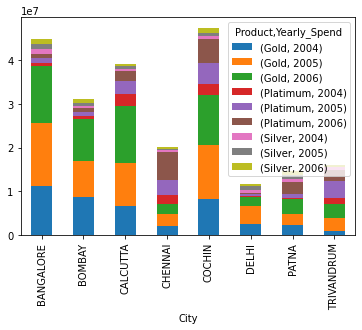

In [71]:
city_wise_Data.plot(kind='bar',stacked=True)
plt.show()

### b. Comparison of yearly spend on air tickets


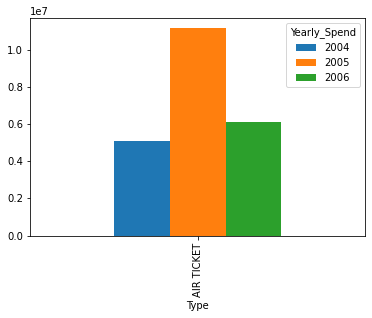

In [76]:
repayment['Yearly_Spend']=repayment['Month'].apply(lambda x:x.year)
pd.pivot_table(data = repayment[repayment.Type=='AIR TICKET'], index = 'Type', columns='Yearly_Spend', 
               values='Amount', aggfunc='sum').plot(kind='bar')
plt.show()

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

<AxesSubplot:xlabel='spend_month'>

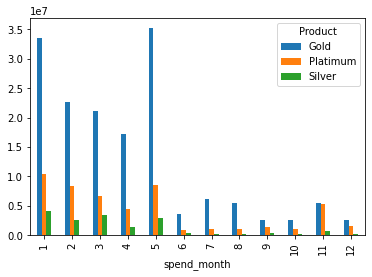

In [80]:
pd.pivot_table(data = spend_analysis, index = 'spend_month', columns='Product', 
               values='Amount', aggfunc='sum').plot(kind='bar')

### 5. Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [88]:
repayment['yearly']=repayment.Month.apply(lambda x:x.year)
repayment['monthly']=repayment.Month.apply(lambda x:x.month)


In [89]:
def top10Customers(product_category,time_period):
    return repayment.loc[(repayment.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)


In [94]:
product_category=str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum: "))
time_period=str(input("Please Enter Time Period and time period should be in yearly/monthly: "))



Please Enter Product Category and product category should be in Gold/Silver/Platinum: Gold
Please Enter Time Period and time period should be in yearly/monthly: yearly


In [95]:
top10Customers_Analysis=top10Customers(product_category,time_period)
top10Customers_Analysis

,Customer,City,Product,yearly,Amount
61,A60,CALCUTTA,Gold,2005,4469330.26
10,A12,BOMBAY,Gold,2005,4228581.52
64,A61,COCHIN,Gold,2005,3930624.30
31,A27,CHENNAI,Gold,2005,3740945.58
62,A60,CALCUTTA,Gold,2006,3670193.79
16,A14,BANGALORE,Gold,2005,3563937.46
13,A13,BANGALORE,Gold,2005,3499001.99
58,A45,COCHIN,Gold,2005,3418440.13
65,A61,COCHIN,Gold,2006,3133076.63
28,A26,PATNA,Gold,2005,3089945.34
